<h2> Load the data </h2>
<p> Data location and info:
https://www.kaggle.com/c/text-normalization-challenge-english-language/data
</p>

In [1]:
import pandas as pd
import zipfile

def Data(path):
    #Unzip and read CSV file located in the data folder
    file_name = path.split('/')[1].replace('.zip','')
    zf = zipfile.ZipFile(path) 
    df = pd.read_csv(zf.open(file_name))
    return df

train_data = Data('data/en_train.csv.zip')
test_data = Data('data/en_test.csv.zip')

<h2> File structure and content </h2>

In [2]:
print ('train_data size',train_data.shape)
pd.options.display.float_format = '{:.2f}'.format
train_data.describe()

('train_data size', (9918441, 5))


,sentence_id,token_id
count,9918441.00,9918441.00
mean,377856.49,7.52
std,215137.11,6.12
min,0.00,0.00
25%,192526.00,3.00
50%,379259.00,6.00
75%,564189.00,11.00
max,748065.00,255.00


In [3]:
print ('test_data size',test_data.shape)
test_data.describe()

('test_data size', (1088564, 3))


,sentence_id,token_id
count,1088564.00,1088564.00
mean,35006.87,8.34
std,20214.62,6.54
min,0.00,0.00
25%,17488.00,3.00
50%,35028.00,7.00
75%,52522.00,12.00
max,69999.00,248.00


In [4]:
train_data.iloc[:10]

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of
5,0,5,PLAIN,plant,plant
6,0,6,PLAIN,in,in
7,0,7,PLAIN,family,family
8,0,8,PLAIN,Acanthaceae,Acanthaceae
9,0,9,PUNCT,.,.


In [5]:
test_data.iloc[:5]

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


<h3> Check for missing values </h3>

In [6]:
if train_data.isnull().values.any():
    print train_data.isnull().sum()


sentence_id     0
token_id        0
class           0
before         51
after          46
dtype: int64


<h5> Missing values exist </h5>
<p>  However, as we can see below, only datapoints of the class PLAIN and LETTERS contain N/A values. For datapoints of the class PLAIN, N/A values are normalized to N/A. In the case of LETTERS, when encountering N/A, the normalization would be the spoken letters <i>n a </i>.Thus there are no missing values. </p>

In [7]:
null_data = train_data[train_data.isnull().any(axis=1)]
null_data.iloc[:10]

,sentence_id,token_id,class,before,after
616107,49226,17,LETTERS,NaN,n a
684691,54634,1,PLAIN,NaN,NaN
965529,76612,7,PLAIN,NaN,NaN
1011291,80126,5,LETTERS,NaN,n a
1347924,106058,6,PLAIN,NaN,NaN
1909700,149031,16,PLAIN,NaN,NaN
1999090,155865,4,PLAIN,NaN,NaN
2465002,191397,1,PLAIN,NaN,NaN
2765431,214094,1,PLAIN,NaN,NaN
3049822,235589,6,PLAIN,NaN,NaN


<h3> Proportion of normalized words </h3>

In [8]:
#The propotion of data that has been normalized?
nontrivial_train_data = train_data[train_data.before != train_data.after]
proportion_nontrivial = nontrivial_train_data.shape[0]/float(train_data.shape[0])
print(proportion_nontrivial)

0.0665264833455


In [9]:
#If we normalize each token to itself we should except the following accuracy
#We should not do worse than this.
print 1 - proportion_nontrivial

0.933473516654


In [10]:
CLASSES = sorted(list(train_data['class'].unique()))
from pprint import pprint
pprint(CLASSES)

['ADDRESS',
 'CARDINAL',
 'DATE',
 'DECIMAL',
 'DIGIT',
 'ELECTRONIC',
 'FRACTION',
 'LETTERS',
 'MEASURE',
 'MONEY',
 'ORDINAL',
 'PLAIN',
 'PUNCT',
 'TELEPHONE',
 'TIME',
 'VERBATIM']


In [11]:
grouped_by_class = train_data.groupby('class')

def proportion_nontrivial(df):
    """
    Args:
    1. df - Dataframe with 'before' and 'after' columns
    
    Returns:
    Proportion of rows in dataframe for which 'before' is not equal to 'after'
    """
    nontrivial = df[df.before != df.after]
    return nontrivial.shape[0]/float(df.shape[0])

class_nontriviality = [(key, proportion_nontrivial(group)) for key, group in grouped_by_class]
print('Proportion of rows for which nontrivial normalization is required (by class):\n')
for key, s in class_nontriviality:
    print('{} - {}'.format(key, s))

Proportion of rows for which nontrivial normalization is required (by class):

ADDRESS - 1.0
CARDINAL - 1.0
DATE - 1.0
DECIMAL - 1.0
DIGIT - 1.0
ELECTRONIC - 0.961642774119
FRACTION - 1.0
LETTERS - 0.944854216434
MEASURE - 0.998511804099
MONEY - 0.999510443864
ORDINAL - 1.0
PLAIN - 0.00496594024254
PUNCT - 0.0
TELEPHONE - 1.0
TIME - 1.0
VERBATIM - 0.330785578942


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yw4l">Always Normalize </th>
    <th class="tg-yw4l">Mostly Normalize</th>
    <th class="tg-yw4l">Almost Never Normalize</th>
    <th class="tg-yw4l">Never Normalize</th>
  </tr>
  <tr>
    <td class="tg-yw4l">ADDRESS</td>
    <td class="tg-yw4l">ELECTRONIC</td>
    <td class="tg-yw4l">PLAIN</td>
    <td class="tg-yw4l">PUNCT</td>
  </tr>
  <tr>
    <td class="tg-yw4l">CARDINAL</td>
    <td class="tg-yw4l">LETTERS</td>
    <td class="tg-yw4l">VERBATIM</td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">DATE</td>
    <td class="tg-yw4l">MEASURE</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">DECIMAL</td>
    <td class="tg-yw4l">MONEY</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">DIGIT</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">FRACTION</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">ORDINAL</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">TELEPHONE</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">TIME</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
</table>

In [30]:
#What is the verbatim class?
verbatim_class = grouped_by_class.get_group('VERBATIM')
verbatim_class[verbatim_class.before != verbatim_class.after].iloc[0:7]

,sentence_id,token_id,class,before,after
279,24,3,VERBATIM,#,number
724,54,11,VERBATIM,&,and
1839,141,12,VERBATIM,pp,p p
3463,279,3,VERBATIM,&,and
4095,337,3,VERBATIM,&,and


In [32]:
trivial_verbatim = verbatim_class[verbatim_class.before == verbatim_class.after]
print (verbatim_class.shape,trivial_verbatim.shape)
trivial_verbatim.iloc[:7]

((78108, 5), (52271, 5))


,sentence_id,token_id,class,before,after
162,14,5,VERBATIM,-,-
980,75,2,VERBATIM,サ,サ
981,75,3,VERBATIM,イ,イ
982,75,4,VERBATIM,バ,バ
983,75,5,VERBATIM,ー,ー
984,75,6,VERBATIM,ス,ス
985,75,7,VERBATIM,レ,レ


In [33]:
from collections import Counter

def generate_recorder_fn(counter):
    def recorder_fn(iterable):
        for c in iterable:
            counter[c] += 1
    return recorder_fn

char_counter = Counter() 
_ = train_data['before'].astype(str).apply(generate_recorder_fn(char_counter))

In [34]:
print (len(char_counter))

190


In [62]:
char_counter.most_common(20)

[('e', 4476701),
 ('a', 3249768),
 ('i', 2849653),
 ('t', 2833328),
 ('n', 2779176),
 ('o', 2705921),
 ('r', 2549428),
 ('s', 2356593),
 ('l', 1596640),
 ('h', 1540689),
 ('d', 1376199),
 ('c', 1141803),
 ('u', 1002108),
 ('m', 886912),
 ('.', 838392),
 ('f', 709653),
 ('p', 691110),
 ('g', 672271),
 ('y', 607170),
 (',', 521202)]

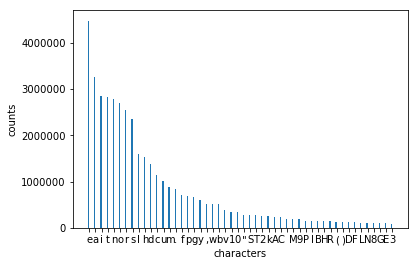

In [63]:
import matplotlib.pyplot as plt
import numpy as np

labels, values = zip(*char_counter.most_common(50))
indexes = np.arange(len(labels))
width = 0.2

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('characters')
plt.ylabel('counts')
plt.show()

<h3> Length of sequences </h3>
<p> For a LSTM, we will need to set the size of the encoding vector. Let's create a histogram of the sentence lengths </p>

In [71]:
def generate_recorder_sfn(counter):
    def recorder_sfn(string):
        counter[len(string)] += 1
    return recorder_sfn

str_len_counter = Counter()
__ = train_data['before'].astype(str).apply(generate_recorder_sfn(str_len_counter))

In [115]:
# print len(str_len_counter)
str_len_counter.most_common(30)

[(1, 2125943),
 (3, 1406840),
 (2, 1258519),
 (4, 1116869),
 (5, 887873),
 (6, 792271),
 (7, 729774),
 (8, 570898),
 (9, 383193),
 (10, 267001),
 (11, 140901),
 (12, 95785),
 (13, 58884),
 (14, 29145),
 (16, 17829),
 (15, 17685),
 (17, 11873),
 (18, 3471),
 (19, 799),
 (20, 584),
 (21, 376),
 (22, 298),
 (23, 235),
 (24, 171),
 (25, 144),
 (26, 102),
 (27, 71),
 (28, 47),
 (29, 29),
 (31, 25)]

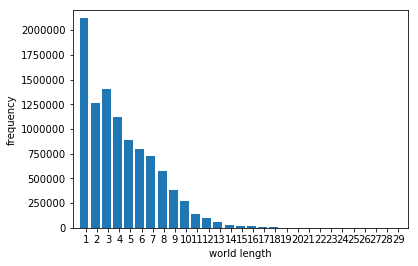

In [108]:
labels, values = zip(*str_len_counter.most_common(30))
labels = np.array(labels)
width = 0.8

plt.bar(labels, values,width)
plt.xticks(labels + width * 0.2, labels)
plt.xlabel('world length')
plt.ylabel('frequency')
plt.axis([0, 30, 0, 2200000])
plt.show()

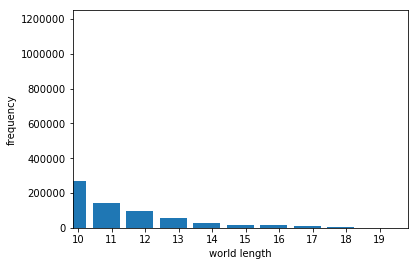

In [113]:
plt.bar(labels,values,width)
plt.xticks(labels + width * 0.2, labels)
plt.xlabel('world length')
plt.ylabel('frequency')
plt.axis([10, 20, 0, 1250000])
plt.show()